In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df_users = pd.read_csv('./29CM_PJT_data/sampled_users.csv')
df_events = pd.read_csv('./29CM_PJT_data/sampled_events.csv')
df_products = pd.read_csv('./29CM_PJT_data/sampled_products.csv')

In [117]:
df_events.event_timestamp = pd.to_datetime(df_events.event_timestamp)

In [118]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880407 entries, 0 to 5880406
Data columns (total 13 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   event_timestamp           datetime64[ns]
 2   event_name                object        
 3   user_no                   object        
 4   item_no                   object        
 5   device_type               object        
 6   mobile_brand_name         object        
 7   mobile_model_name         object        
 8   mobile_marketing_name     object        
 9   operating_system_version  object        
 10  country                   object        
 11  region                    object        
 12  platform                  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 583.2+ MB


### df events's null
mobile_brand_name has null 3594 <br>
mobile_model_name has null 3594 <br>
mobile_marketing_name has null 4250941 <br>
country has null 12 <br>
region has null 2195 <br>


티를 5장 샀는데 Log의 low 5개가 찍혔어. 어떻게 찍혔을까 -> timestamp가 동일하게 찍힐까? <br>

데이터 테이블은 PK가 필수가 아니에요 <br>

PK 없는 데이터 테이블이에요. <br>
FK 두 개.

그 다음 안건 
티 5장 샀을때 두 가지 방법으로 Log 
5개의 로우

1000 티

세션 1 네임 1 price * 5 

- 전환율이 낮은 카테고리에 대해 분석하고 입점할 수 있는 브랜드를 제안해보자
- 고객 가치 향상을 위한 유저 행동 분석
- 29CM 브랜드 분석을 통한 신규 브랜드 사 입점 가이드 제안
- 29cm의 미션, 'Guide to Better choice"에 적합한 KPI 제안을 위한 데이터 분석

In [3]:
# 재구매율 -> 옷 한 상품에 대한 재구매율보다는
# 여러 사이트중에서 29 cm 다시 선택이유

In [4]:
df_products

,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.0,244100100,잡화,244102100,가방,244102104,토트백,2546.0,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.0,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.0,밀크바오밥
...,...,...,...,...,...,...,...,...,...,...,...,...
283321,zznjWkK64Fsflp1BbqeXQA==,SUMMER WOOL DOLMAN SLEEVE KNIT CARDIGAN,6e4bac52c12f2b2b923404c926fe404f,145000.0,243100100,의류,243102100,상의,243102102,카디건,14321.0,Carriere
283322,zzq8OW9uW0wofJhaKzp/Fg==,Silket Cotton Jersey T-Shirt Grey,569af51a0a61f7156b34b5cf251b82f0,98000.0,243100100,의류,243102100,상의,243102103,티셔츠,2085.0,aheit
283323,zzxE9xkXnKM0B4Y+hev34w==,[본사직영] 골라클래식 남성 COASTER HIGH (WHITE) GC_MA205_WW,3ca49f5d240325423bdc90942e2d61c5,75000.0,244100100,잡화,244101100,신발,244101115,스니커즈,4440.0,GOLA
283324,zzzTNW8escss3zrnpuGMhQ==,21SS 마몬트 퀄팅 숄더/크로스백 448065 DTD1T 1000,00acf5906a360209ea248ae8933a2408,1743300.0,244100100,잡화,244102100,가방,244102103,크로스백,9410.0,GUCCI_바이스트


In [5]:
df_users

,user_no,birth_date,gender
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F
...,...,...,...
254953,zzJh2DNSlyzZYCx1T7Yprw==,1984-02-01,F
254954,zzQb08qbNg8VZ+c3wMVhuw==,1972-12-15,F
254955,zzblhcY6j0rWP7m/5w6kqg==,2002-02-26,F
254956,zzzTNW8escss3zrnpuGMhQ==,1991-10-27,M


In [6]:
df = pd.merge(df_events, df_users, how='inner', on = 'user_no')

In [7]:
df[df.birth_date.isnull()]

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,birth_date,gender
4219,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:00:48.808,like_item,s+QCCrwiN36OfluPaKsqzw==,+X82Bkul3BplVDUnX+WaYg==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4220,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:01:07.605,like_item,s+QCCrwiN36OfluPaKsqzw==,oFRXXqTkVnEBJuYzlZzLtQ==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4221,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:01:43.045,like_item,s+QCCrwiN36OfluPaKsqzw==,zXRgNScG1dBqAjJPlpqPhw==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4222,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:02:08.381,like_item,s+QCCrwiN36OfluPaKsqzw==,QRY6WwQjWlgMOQdsXs5s8Q==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4223,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:02:12.625002,like_item,s+QCCrwiN36OfluPaKsqzw==,gXgFwJBeGoeGayPBETagpw==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880365,2100415c83a75015c2871380a11d68ea,2021-08-04 12:55:38.518389,click_item,e9gsRKeMUCVPV9r6wGDpAQ==,gbHR4UJxKo9iJ1dAGgVW2g==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gangwon-do,IOS,NaN,NaN
5880389,8fa7e001b0726a30e799732f7a1455ce,2021-08-04 12:45:18.233026,click_item,U2tJSblGok/L07FXpieMZg==,khhvcMemv0I6X55M/FGCwQ==,mobile,Apple,iPhone,NaN,iOS 14.7,South Korea,Seoul,IOS,NaN,NaN
5880399,cca300cbbd5d0c1e80aede995c9eab69,2021-08-04 12:53:34.684042,click_item,6h/NOtV+88A7Cddek6xeVA==,zcrGyr5mrVB7tgo030A1KQ==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Daejeon,IOS,NaN,NaN
5880401,4348b62152f744dbb4b9e401892451de,2021-08-04 12:58:36.366004,purchase_success,AL2Sst8MhZsOlxg5TibxsA==,D0VWjbDA0Hn/u4LJSwVyDw==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS,NaN,NaN


In [6]:
df_events # log data 
for cols in df_events.columns:
    if df_events[cols].is_unique:
        print(cols)

In [7]:
for col in df_products.columns:
    if df_products[col].is_unique:
        print(col)

item_no
image_name


In [8]:
for col in df_users.columns:
    if df_users[col].is_unique:
        print(col)

user_no


/var/folders/3d/fksyvw8102q5p7zbsjrk_qs80000gn/T/ipykernel_23588/2041089019.py:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


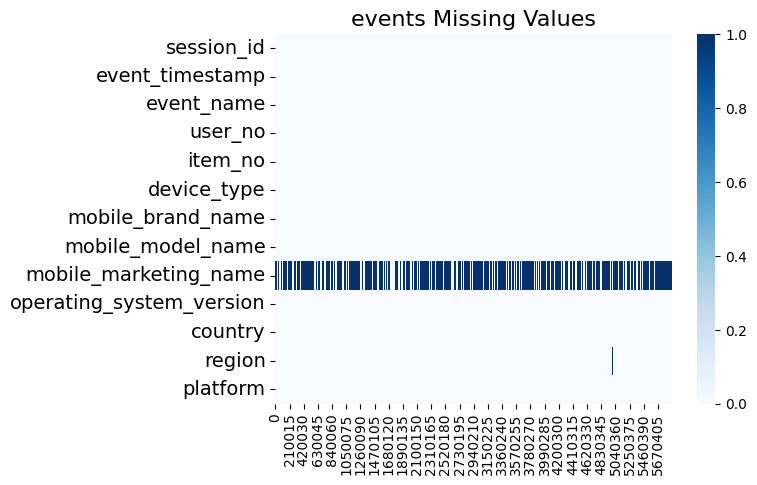

In [9]:
f, ax = plt.subplots(nrows=1, ncols=1)

sns.heatmap(df_events.T.isna(), cmap='Blues')
ax.set_title('events Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

/var/folders/3d/fksyvw8102q5p7zbsjrk_qs80000gn/T/ipykernel_23588/2748212504.py:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


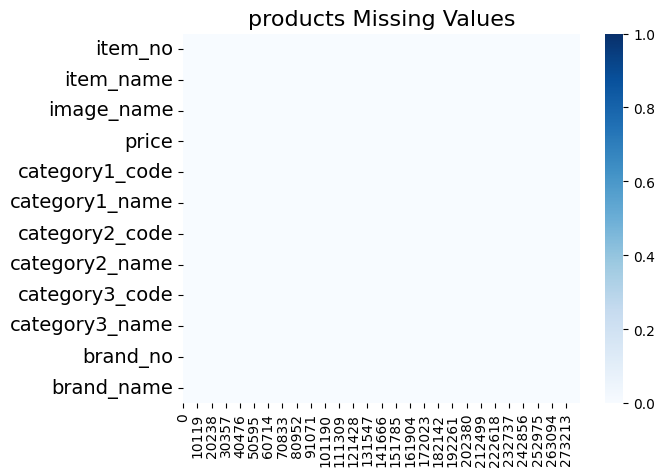

In [10]:
f, ax = plt.subplots(nrows=1, ncols=1)

sns.heatmap(df_products.T.isna(), cmap='Blues')
ax.set_title('products Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

/var/folders/3d/fksyvw8102q5p7zbsjrk_qs80000gn/T/ipykernel_23588/3753195454.py:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


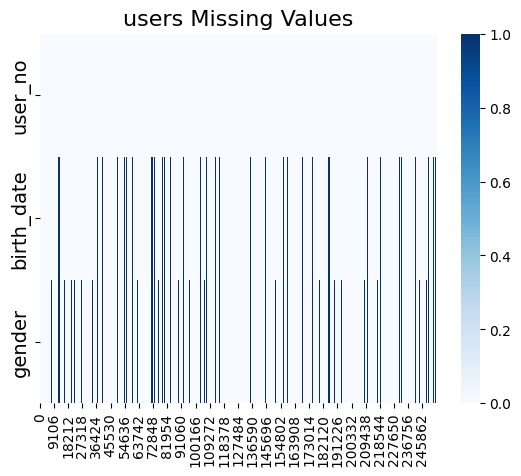

In [11]:
f, ax = plt.subplots(nrows=1, ncols=1)

sns.heatmap(df_users.T.isna(), cmap='Blues')
ax.set_title('users Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

코호트 분석

접속한 모바일 기기가 바뀐 유저 탐색 <br>
action plan : 해당 기기에 맞춘 액세서리 추천 가능

코드 수정 필요. for문으로 데이터 프레임을 돌리면 오래걸림.
최대한 pandas 내부에서 조건문 거는 형식으로 개선할 것

In [36]:
sum(~(df_events[df_events.user_no == '+9eODQMZ8YgXQZJJAo56nw=='].duplicated(subset = 'mobile_marketing_name', keep=False)))

0

In [ ]:
def get_change_mobile_user(df:pd.DataFrame)->list:
    '''
    이용자의 접속기록에서 접속한 모바일기기의 변화를 찾습니다.
    함수의 반환은 사용자와 timestamp의 tuple을 원소로 가지는 list입니다.
    **시간복잡도 개선 필요 **
    '''
    df_mobile = df[['user_no', 'mobile_brand_name','event_timestamp']].copy()
    change_mobile = []
    cnt = 0

    for idx, user_name in enumerate(df_users.user_no):
        if sum(~(df_events[df_events.user_no == user_name].duplicated(subset = 'mobile_marketing_name', keep=False))) > 0:
            cnt += 1
            change_mobile.append(user_name)
            print(user_name)
            
        print(f'\r{idx}/{len(df_users)} | 추가된 인원 : {cnt}, {user_name}',end="") # 프로세스 진행
    return change_mobile

change_mobile = get_change_mobile_user(df_events)

In [46]:
sum(~(df_events[df_events.user_no == '+7FYrctWjOuZyFmZZ+GsYQ=='].duplicated(subset = 'mobile_marketing_name', keep=False)))

1

In [47]:
len(df_events[df_events.user_no == '+7FYrctWjOuZyFmZZ+GsYQ=='].mobile_brand_name.unique()) > 1

False

In [42]:
sum(~(df_events[df_events.user_no == '+7FYrctWjOuZyFmZZ+GsYQ=='].duplicated(subset = 'mobile_marketing_name', keep=False))) > 0

True

In [ ]:
def get_change_mobile_user(df:pd.DataFrame)->list:
    '''
    이용자의 접속기록에서 접속한 모바일기기의 변화를 찾습니다.
    함수의 반환은 사용자와 timestamp의 tuple을 원소로 가지는 list입니다.
    **시간복잡도 개선 필요 **
    '''
    df_mobile = df[['user_no', 'mobile_brand_name','event_timestamp']].copy()
    change_mobile = []
    cnt = 0

    for idx, user_name in enumerate(df_users.user_no):
        if len(df_mobile[df_mobile.user_no == user_name].mobile_brand_name.unique()) > 1:
            cnt += 1
            change_mobile.append(user_name)
            # print(f'\n{user_name}')
            
        print(f'\r{idx}/{len(df_users)} | 추가된 인원 : {cnt}, {user_name}',end="") # 프로세스 진행
    return change_mobile

change_mobile = get_change_mobile_user(df_events)

사용자 획득일 추가 <br>
*사용자 획득일:사용자 세션을 처음 시작한 날

In [ ]:
def get_users_first_session(df:pd.DataFrame)->pd.DataFrame:
    '''
    유저가 기록단위에서 세션에 처음 등장한 event time stamp를 찾습니다 : 사용자 획득 |
    반환은 pandas DataFrame 객체입니다.
    '''
    df_user_first = df.copy()
    df_user_first['first_visit'] = 0
    for idx, user_name in enumerate(df_user_first.user_no):
        df_user_first['first_visit'] = df_events.event_timestamp[df_events.user_no == 'qik2Oa/1SQAjHeR64GLY0g=='].iloc[0]
        print(f'\r {idx}/{len(df_users)} : {user_name}', end="") # 프로세스 확인
    return df_user_first

df_user_first = get_users_first_session(df_users)

# 코호트 분석 - 리텐션

## 단위기간 : 주단위

In [127]:
df_events["week"] = df_events.event_timestamp.dt.isocalendar().week

user_no 인덱스

In [119]:
df_events.set_index('user_no', inplace=True)

In [120]:
df_events.head()

,session_id,event_timestamp,event_name,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
user_no,,,,,,,,,,,,
+9eODQMZ8YgXQZJJAo56nw==,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID
qik2Oa/1SQAjHeR64GLY0g==,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID
FJJ6W70VNARaqflivNavLg==,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.350000,click_item,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
MsFi+mS5EhwSv+ZqTtZ53w==,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994000,click_item,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
frWHEf/czsCEjklEIwxxKA==,3316370366bdbd2fdff02e996c1b2721,2021-06-03 13:00:03.312001,add_to_cart,yXpbzgtgRe37PEbJlBiKmQ==,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID


각 유저별 단뒤 기간 세션 첫 등장 시간

In [121]:
first_order = df_events.groupby(df_events.index)['event_timestamp'].min()

주 단위로 변경

In [136]:
first_order = first_order.dt.isocalendar().week

first_action 컬럼에 병합

In [137]:
df_events['first_action'] = first_order

인덱스 초기화

In [139]:
df_events.reset_index(inplace=True)

In [143]:
df_events[['user_no','week','first_action']].tail()

,user_no,week,first_action
5880402,ROKDMwVDKbb9N82CptJ9dg==,31,24
5880403,0nfvwBd9Qriig0lIgvtiBA==,31,23
5880404,Z0a8cvN+t0V2WInGzjkM5Q==,31,29
5880405,vQeO3FiA+W7bmyu2tdKuGg==,31,22
5880406,GMv4Y+rk7KkfcR5qlFVrBQ==,31,22


groupby 함수에 첫 세션 등장(first_action), event별 세션 기간(week)를 함께 전달

In [174]:
grouped = df_events.groupby(['first_action', 'week'])

nunique로 user_no를 집계 <br>
> nunique : unique값의 개수

In [175]:
cohorts = grouped['user_no'].nunique()
cohorts.head()

first_action  week
22            22      48498
              23      26553
              24      23824
              25      23171
              26      23717
Name: user_no, dtype: int64

In [176]:
cohorts = cohorts.reset_index()
cohorts.head()

,first_action,week,user_no
0,22,22,48498
1,22,23,26553
2,22,24,23824
3,22,25,23171
4,22,26,23717


In [177]:
cohorts.rename({'user_no':'total_users'}, axis=1, inplace=True)
cohorts.head()

,first_action,week,total_users
0,22,22,48498
1,22,23,26553
2,22,24,23824
3,22,25,23171
4,22,26,23717


코호트 기간 등차수열 확인

In [180]:
each_period = cohorts['first_action'].value_counts().sort_index()
each_period

22    10
23     9
24     8
25     7
26     6
27     5
28     4
29     3
30     2
31     1
Name: first_action, dtype: Int64

기간별 레이블 붙이기

In [182]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

레이블 확인

In [184]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head(20)

,first_action,week,total_users,CohortPeriod
0,22,22,48498,0
1,22,23,26553,1
2,22,24,23824,2
3,22,25,23171,3
4,22,26,23717,4
5,22,27,22906,5
6,22,28,22435,6
7,22,29,21082,7
8,22,30,20232,8
9,22,31,11242,9


In [185]:
cohorts.set_index(['first_action','CohortPeriod'],inplace=True)
cohorts.head()

week  total_users
first_action CohortPeriod                   
22           0               22        48498
             1               23        26553
             2               24        23824
             3               25        23171
             4               26        23717

unstack(1)을 하게되면 생성된 멀티인덱스 중 두 번째 인덱스(CohortPeriod)가 칼럼으로 변경, 그 결과 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태를 갖추게 됨

In [186]:
cohorts=cohorts['total_users'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9
first_action,,,,,,,,,,
22,48498.0,26553.0,23824.0,23171.0,23717.0,22906.0,22435.0,21082.0,20232.0,11242.0
23,47968.0,17596.0,16252.0,16542.0,15940.0,15670.0,14415.0,13588.0,6593.0,NaN
24,33105.0,10201.0,9320.0,8614.0,8351.0,7652.0,6925.0,3134.0,NaN,NaN
25,25082.0,7240.0,5889.0,5502.0,4937.0,4480.0,1974.0,NaN,NaN,NaN
26,27641.0,6383.0,5121.0,4381.0,4031.0,1677.0,NaN,NaN,NaN,NaN
27,20862.0,4778.0,3555.0,3159.0,1315.0,NaN,NaN,NaN,NaN,NaN
28,19034.0,4316.0,2890.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN
29,15892.0,3078.0,1036.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,12608.0,1306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


cohorts[0]을 입력하면 cohorts의 첫 번째 칼럼을 선택하게 되고, 이 칼럼은 각 코호트 첫 번째 기간(0주)에 대한 데이터로 구성됨

In [187]:
cohorts[0]

first_action
22    48498.0
23    47968.0
24    33105.0
25    25082.0
26    27641.0
27    20862.0
28    19034.0
29    15892.0
30    12608.0
31     4268.0
Name: 0, dtype: float64

첫 코호트 기간의 순방문자(cohorts[0])로 나누어(divide) 줌

In [188]:
user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9
first_action,,,,,,,,,,
22,1.0,0.547507,0.491237,0.477772,0.489030,0.472308,0.462596,0.434698,0.417172,0.231803
23,1.0,0.366828,0.338809,0.344855,0.332305,0.326676,0.300513,0.283272,0.137446,NaN
24,1.0,0.308141,0.281528,0.260202,0.252258,0.231143,0.209183,0.094668,NaN,NaN
25,1.0,0.288653,0.234790,0.219360,0.196834,0.178614,0.078702,NaN,NaN,NaN
26,1.0,0.230925,0.185268,0.158496,0.145834,0.060671,NaN,NaN,NaN,NaN
27,1.0,0.229029,0.170406,0.151424,0.063033,NaN,NaN,NaN,NaN,NaN
28,1.0,0.226752,0.151834,0.059105,NaN,NaN,NaN,NaN,NaN,NaN
29,1.0,0.193682,0.065190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1.0,0.103585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


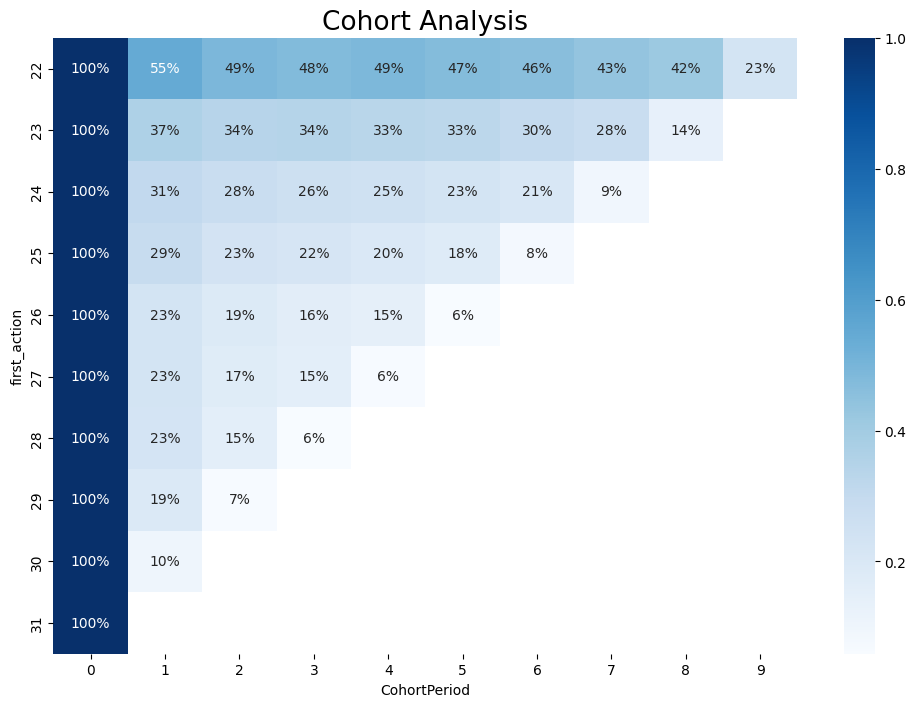

In [191]:
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%', cmap = "Blues")
plt.show()

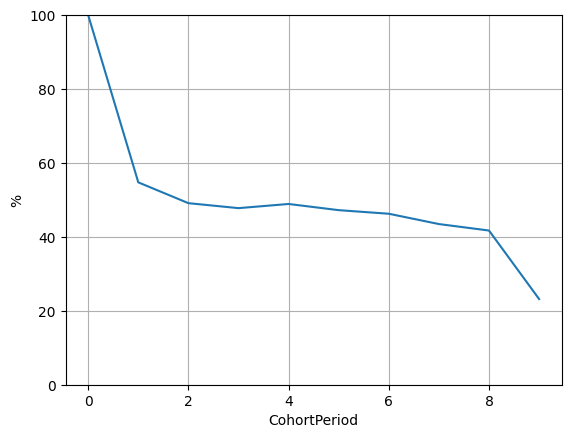

In [198]:
sns.lineplot(data = user_retention.iloc[0]*100)
plt.ylim(0,100)
plt.ylabel('%')
plt.grid()
plt.show()

### 경험 : click_item

### 경험 : add_to_cart

### 경험 : like_item

### 경험 : like_item